In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
text_df=pd.read_csv("twitter_training[1].csv")
text_df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
text_df.shape

(74681, 4)

In [4]:
text_df.columns

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [5]:
text_df.isnull().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [6]:
text_new = text_df.dropna(axis=0)

In [7]:
text_new.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [8]:
text_new.duplicated().sum()
text_new.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_44836\852125030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_new.drop_duplicates(inplace=True)


In [9]:
text_new.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
text_new.rename(columns={"Positive":"Sentiment","im getting on borderlands and i will murder you all ,":"text"},inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_44836\1022298570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_new.rename(columns={"Positive":"Sentiment","im getting on borderlands and i will murder you all ,":"text"},inplace=True)


In [11]:
text_new.head()

,2401,Borderlands,Sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


<Axes: xlabel='Sentiment'>

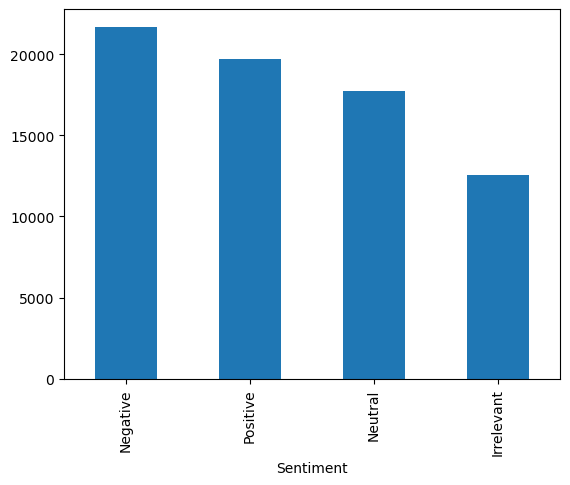

In [12]:
text_new["Sentiment"].value_counts().plot(kind='bar')

In [13]:
import nltk
from stop_words import get_stop_words
stopwords=get_stop_words("english")

In [14]:
total_stopwords=set(stopwords)

negative_stop_words=set(word for word in total_stopwords
                       if "n't" in word or "no" in word)
final_stopwords=total_stopwords-negative_stop_words

final_stopwords.add("one")
print(final_stopwords)

{'off', 'my', 'was', "you're", 'down', "that's", 'am', 'does', 'then', 'where', 'which', 'yours', "there's", "he'll", 'on', 'very', "it's", "they'll", 'those', "when's", 'again', "let's", 'they', 'with', 'between', 'are', 'a', 'some', 'theirs', "they've", 'all', 'until', "why's", 'himself', 'could', "we'd", 'yourselves', 'if', 'above', "he's", 'here', "you'd", "she'd", 'i', 'when', 'should', 'his', 'our', 'at', 'more', 'out', 'you', 'so', "we've", 'through', 'why', 'before', 'having', "she'll", "where's", 'any', 'there', 'how', 'its', 'own', 'because', "we'll", 'most', 'itself', "they'd", 'had', 'did', 'doing', 'be', 'what', 'it', 'ours', 'this', 'below', 'or', 'that', 'me', 'during', 'him', 'but', 'do', 'ought', 'against', 'under', 'being', 'in', "i'll", "he'd", 'up', 'have', "here's", 'she', 'as', 'from', 'same', 'one', 'ourselves', 'themselves', 'to', 'while', 'other', "you'll", 'by', 'only', "she's", 'yourself', 'over', 'too', 'an', 'than', 'for', 'he', 'herself', 'once', "we're", 

In [15]:
#stemming object
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import string
import re

In [16]:
stemmer=PorterStemmer()
HTMLTAGS=re.compile("<.*?>")

table=str.maketrans(dict.fromkeys(string.punctuation))

remove_digits=str.maketrans('', '',string.digits)

MULTIPLE_WHITESPACE=re.compile(r"\s+")

In [17]:
def Text_preprocessor(review):
    
    review=HTMLTAGS.sub(r'',review)

    review=review.translate(table)
    
    review=review.translate(remove_digits)
    
    review=review.lower()
    
    review=MULTIPLE_WHITESPACE.sub(" ",review).strip()
    
    review=[word for word in review.split()
           if word not in final_stopwords]
    #stemming
    review=' '.join([stemmer.stem(word)  for word in review])
    
    return review
    
   

In [18]:
text="the biggest dissappoinment in my life coming out a year ago fuck borderlands 3"


In [19]:
Text_preprocessor(text)

'biggest dissappoin life come year ago fuck borderland'

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import  stopwords
def generate_wcloud(text):
    stopwords=set(STOPWORDS)
    
    wordcloud=WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show() 

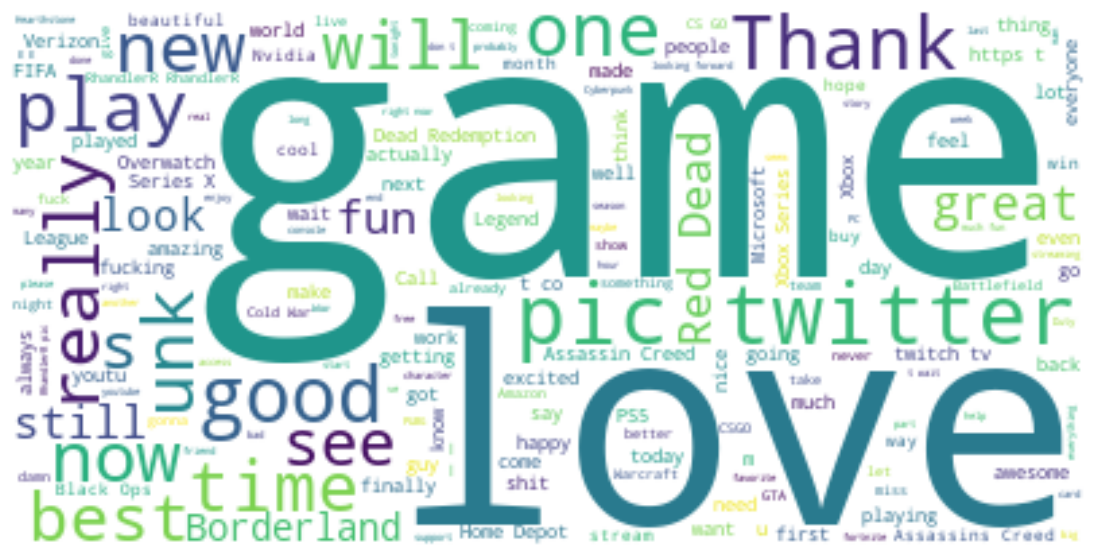

In [21]:
pos=text_new.loc[text_new.Sentiment=="Positive"].text
text="".join(review for review in pos.astype(str))
generate_wcloud(text)

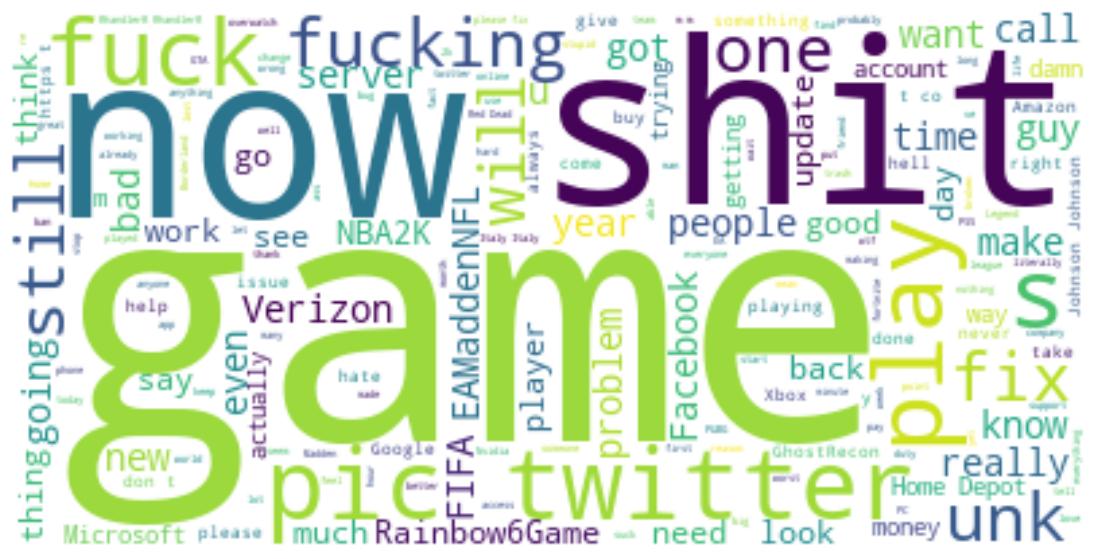

In [22]:
neg=text_new.loc[text_new.Sentiment=="Negative"].text
text="".join(review for review in neg.astype(str))
generate_wcloud(text)

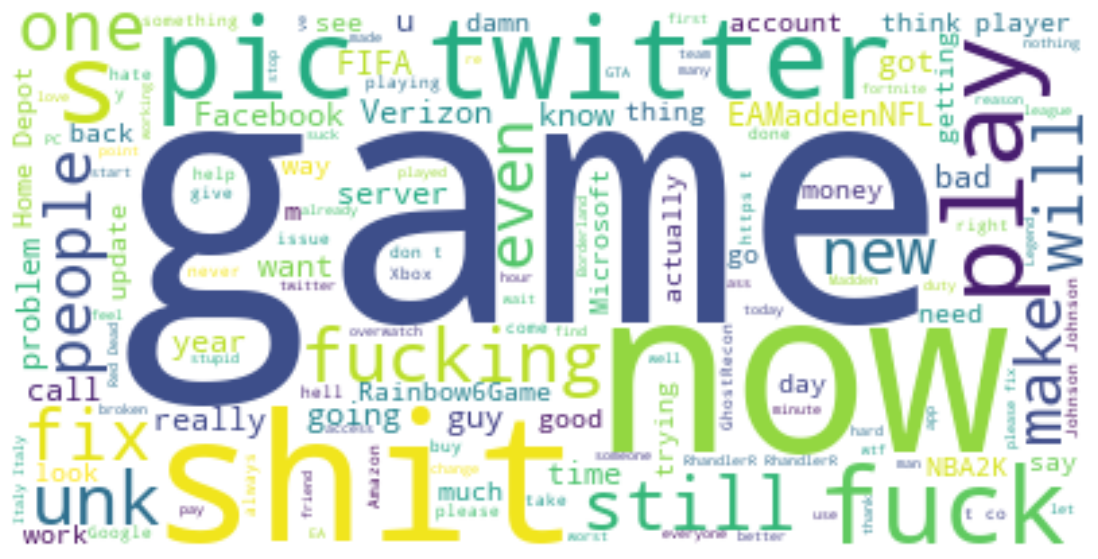

In [23]:
neu=text_new.loc[text_new.Sentiment=="Negative"].text
text="".join(review for review in neu.astype(str))
generate_wcloud(text)

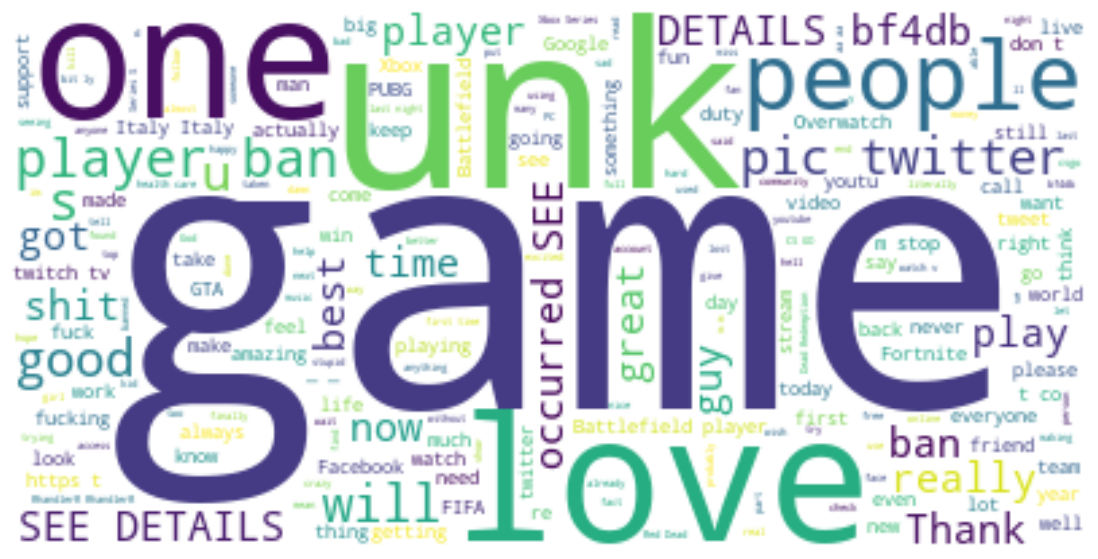

In [24]:
irr=text_new.loc[text_new.Sentiment=="Irrelevant"].text
text="".join(review for review in irr.astype(str))
generate_wcloud(text)

Splitting the data into training and testing

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X=text_new.text
y=text_new.Sentiment

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20,stratify=y)



In [35]:
X_train.shape,X_test.shape

((57324,), (14331,))

In [36]:
bow_vectorizer=CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)
#transform
bow_X_train=bow_vectorizer.transform(X_train)
bow_X_test=bow_vectorizer.transform(X_test)


In [37]:
bow_X_train

<57324x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 897619 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)
#transform
tfidf_X_train=tfidf_vectorizer.transform(X_train)
tfidf_X_test=tfidf_vectorizer.transform(X_test)

In [39]:
tfidf_X_train

<57324x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 897619 stored elements in Compressed Sparse Row format>

In [40]:
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()

y_train=labelEncoder.fit_transform(y_train)
y_test=labelEncoder.transform(y_test)

labels=labelEncoder.classes_.tolist()
print(labels)



['Irrelevant', 'Negative', 'Neutral', 'Positive']


In [41]:
def train_and_eval(model,trainX,trainY,testX,testY):
    
    model.fit(trainX, trainY)
    
    y_pred_train=model.predict(trainX)
    y_pred_test= model.predict(testX)
    
    #evaluation
    print()
    print(model)
    print(f"Train accuracy score:{accuracy_score(y_train,y_pred_train)}")
    print(f"Test accuracy score:{accuracy_score(y_test,y_pred_test)}")
    print('\n',40*'-')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
#Hyperparameters
C=[0.001,0.01,0.1,1,10]

for c in C:
           log_model=LogisticRegression(C=c,max_iter=500,random_state=1)
           train_and_eval(model=log_model,
              trainX=bow_X_train,
              trainY=y_train,
              testX=bow_X_test,
              testY=y_test)
    


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score:0.5446933221687251
Test accuracy score:0.5403670364943131

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score:0.642174307445398
Test accuracy score:0.612867210941316

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score:0.7748063638266695
Test accuracy score:0.7134184634707976

 ----------------------------------------


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score:0.8655188053869235
Test accuracy score:0.7729397808945643

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score:0.905711394878236
Test accuracy score:0.7873839927430046

 ----------------------------------------


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive BAYS- Hyperparameters and CountVectorizer

In [45]:
from sklearn.naive_bayes import MultinomialNB


In [46]:
alphas=[0,0.2,0.6,0.8,1]

for a in alphas:
          nb_model=MultinomialNB(alpha=a)
          train_and_eval(model=nb_model,
              trainX=bow_X_train,
              trainY=y_train,
              testX=bow_X_test,
              testY=y_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(



MultinomialNB(alpha=0)
Train accuracy score:0.7588270183518248
Test accuracy score:0.6988346940199568

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score:0.7447665899099853
Test accuracy score:0.6907403530807341

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score:0.7336543158188542
Test accuracy score:0.6830646849487125

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score:0.7297641476519433
Test accuracy score:0.6806224269067057

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score:0.726449654594934
Test accuracy score:0.6779708324610983

 ----------------------------------------


Logistic Regression- Hyperparameters and Tfidf vectorize

In [47]:
#Hyperparameters
C=[0.001,0.01,0.1,1,10]

for c in C:
           log_model=LogisticRegression(C=c,max_iter=500,random_state=1)
           train_and_eval(model=log_model,
              trainX=tfidf_X_train,
              trainY=y_train,
              testX=tfidf_X_test,
              testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score:0.33094340939222666
Test accuracy score:0.33130974809852765

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score:0.5579687390970623
Test accuracy score:0.5506942990719419

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score:0.6601074593538483
Test accuracy score:0.6272416439885563

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score:0.8059102644616566
Test accuracy score:0.7318400669876491

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score:0.8806956946479659
Test accuracy score:0.7874537715442048

 ----------------------------------------


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bays-Hyperparameters and Tfidf vectorizer

In [48]:
alphas=[0,0.2,0.6,0.8,1]

for a in alphas:
          nb_model=MultinomialNB(alpha=a)
          train_and_eval(model=nb_model,
              trainX=tfidf_X_train,
              trainY=y_train,
              testX=tfidf_X_test,
              testY=y_test)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(



MultinomialNB(alpha=0)
Train accuracy score:0.7808422301304864
Test accuracy score:0.7134184634707976

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score:0.7623334031121345
Test accuracy score:0.7003000488451608

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score:0.7411380922475752
Test accuracy score:0.6857860581955202

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score:0.7332879771125532
Test accuracy score:0.6790872932803015

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score:0.7253855278766311
Test accuracy score:0.6742027771962877

 ----------------------------------------


Best Model. LogisticRegression

In [50]:
bmodel=LogisticRegression(C=1, max_iter=500, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [51]:
y_pred_train=bmodel.predict(tfidf_X_train)
y_pred_test=bmodel.predict(tfidf_X_test)

In [52]:
print(f"Train accuracy score:{accuracy_score(y_train,y_pred_train)}")
print(f"Test accuracy score:{accuracy_score(y_test,y_pred_test)}")

Train accuracy score:0.8059102644616566
Test accuracy score:0.7318400669876491


In [53]:
def plot_cm(y_true,y_pred):
    plt.figure(figsize=(6,6))
    cm=confusion_matrix(y_true,y_pred, normalize="true")
    sns.heatmap(
    cm, annot=True, cmap='Blues',cbar=False, fmt=".2f",
    xticklabels=labels,yticklabels=labels)
    
    return plt.show()

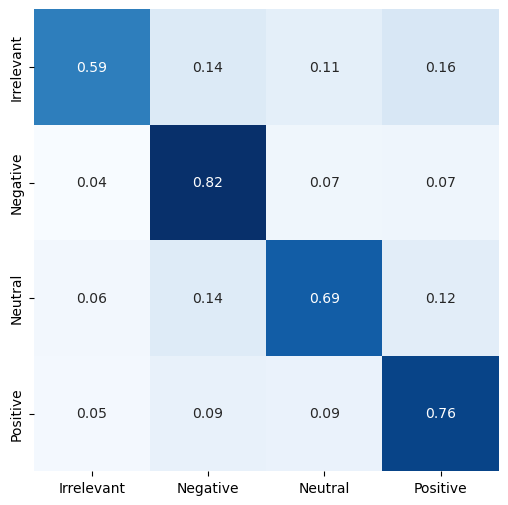

In [54]:
plot_cm(y_test,y_pred_test)

Prediction on single review

In [55]:
def get_sentiment(review):
    x=Text_preprocessor(review)
    x=tfidf_vectorizer.transform([x])
    y=int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [56]:
#Negative  review
review="Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? ðŸ™„"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!


In [57]:
#Positive review
review="Bought a fraction of Microsoft today. Small wins."
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


In [58]:
#Neutral review
review="The Russians from cs:go are starting to invade Osu..."
print(f"This is a {get_sentiment(review)} review!")

This is a Neutral review!


In [59]:
#Irrelevant review
review="HOW DID I MISS THIS I CANT EVEN BLAME SCHOOL ARE YOU KIDDING ME"
print(f"This is a {get_sentiment(review)} review!")

This is a Irrelevant review!
